In [1]:
from rbibm.plots.main_plots import plot_adversarial_posterior_predictive, plot_adversarial_posterior
from rbibm.utils.utils_data import load_posterior_samples_by_id, get_model_by_id, get_adversarial_examples_by_id, query, get_model_by_idx, query_main, remove_entry_by_id
from rbibm.plots.metric_plots import plot_rob_tolerance_plot, plot_expected_coverage
from rbibm.plots.multi_plots import multi_plot

from rbibm.plots.styles import use_style
from rbibm.tasks import HHTask
import torch

import matplotlib.pyplot as plt

In [2]:
name = "vae"

In [3]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }
color_map_N_train = {1000.: "#78c679", 10000.: "#238443", 100000.: "#004529"}
color_map_attack = {"L2PGDAttack": "#023858", "L2UniformNoiseAttack": "#a6bddb"}

In [4]:
color_map_defenses0 = {"FIMTraceRegularizer": "#8856a7"}
color_map_defenses1 = {"FIMTraceRegularizer": "#e6a6ed", "FIMLargestEigenvalueRegularizer": "#410466"}

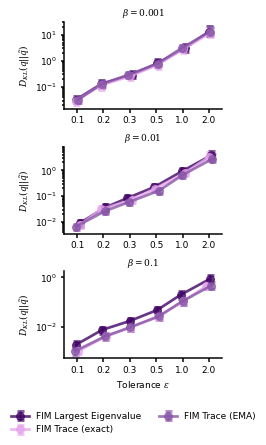

In [5]:
with use_style("pyloric"):
    fig, axes = plt.subplots(3,1, figsize=(3,5.5))


    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="jac_exact", params_defense_beta=0.001, ax=axes[0], jitter=True, alpha=0.8, color_map=color_map_defenses1)
    ax.legend_ = None
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="ema",  ax=axes[0], params_defense_beta=0.001, jitter=True, alpha=0.8, color_map=color_map_defenses0)
    ax.legend_ = None
    ax.set_ylabel(None)

    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="jac_exact", params_defense_beta=0.01, ax=axes[1], jitter=True, alpha=0.8, color_map=color_map_defenses1)
    ax.legend_ = None
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="ema",  ax=axes[1], params_defense_beta=0.01, jitter=True, alpha=0.8, color_map=color_map_defenses0)
    ax.legend_ = None
    ax.set_ylabel(None)
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="jac_exact", params_defense_beta=0.1, ax=axes[2], jitter=True, alpha=0.8, color_map=color_map_defenses1)
    ax.legend_ = None
    _, ax = plot_rob_tolerance_plot(name, hue="defense", params_defense_algorithm="ema", ax=axes[2], params_defense_beta=0.1, jitter=True, alpha=0.8, color_map=color_map_defenses0)
    ax.legend_ = None
    ax.set_ylabel(None)

    axes[0].set_ylabel(r"$D_{KL}(q||\tilde{q})$")
    axes[1].set_ylabel(r"$D_{KL}(q||\tilde{q})$")
    axes[2].set_ylabel(r"$D_{KL}(q||\tilde{q})$")
    axes[0].set_xlabel(None)
    axes[1].set_xlabel(None)
    axes[0].set_title(r"$\beta=0.001$")
    axes[1].set_title(r"$\beta=0.01$")
    axes[2].set_title(r"$\beta=0.1$")
    fig.legend(["FIM Largest Eigenvalue", "FIM Trace (exact)", "FIM Trace (EMA)"], ncol=2, bbox_to_anchor=[1.15, -0.02])
    fig.tight_layout()
    fig.savefig("appendix_rob_fim_approx")

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['0681eb42-7ae8-4f2f-97df-cd012894f393']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['82574463-0d70-4b0d-a45a-52ee574a9ffc']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['6f80453b-4e4d-4cb6-8cb7-33ebb7a471e2']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['f384a82e-5d83-4cb6-8a70-485eeb9cebba']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['6bcf6d35-158f-4f4a-8e6f-71d5a618935a']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['59e29c18-d11a-420b-9e1d-59e7cac58e8c']
Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['76fb6683-47a8-4436-bc36-c95833780434']

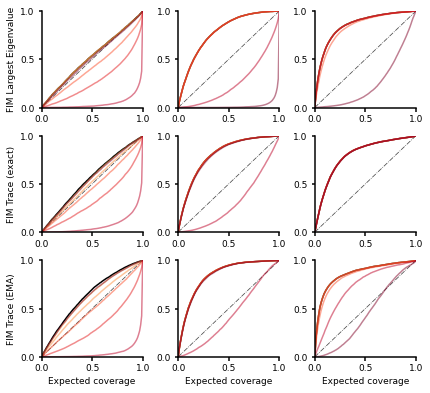

In [6]:
with use_style("pyloric"):
    fig, axes = plt.subplots(3, 3, figsize=(6,5.5))
    i = 0
    for beta in [0.001, 0.01, 0.1]:
        ax = axes[0, i]
        _, ax = plot_expected_coverage(name, defense="FIMLargestEigenvalueRegularizer", hue="eps",with_eps=True, params_defense_beta=beta, color_map=color_map_eps, with_grid=False, ax=ax)
        ax.legend_ = None
        i += 1
        ax.set_xlabel(None)
        if i > 1:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel("FIM Largest Eigenvalue")

    i = 0
    for beta in [0.001, 0.01, 0.1]:
        ax = axes[1, i]
        _, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True,params_defense_algorithm="jac_exact", params_defense_beta=beta, color_map=color_map_eps, with_grid=False, ax=ax)
        ax.legend_ = None
        i += 1
        ax.set_xlabel(None)
        if i > 1:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel("FIM Trace (exact)")


    i = 0
    for beta in [0.001, 0.01, 0.1]:
        ax = axes[2, i]
        _, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True,params_defense_algorithm="ema", params_defense_beta=beta, color_map=color_map_eps, with_grid=False, ax=ax)
        ax.legend_ = None
        i += 1
        if i > 1:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel("FIM Trace (EMA)")

    fig.tight_layout()
    fig.savefig("appendix_expected_coverage_fim_approx")

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['0681eb42-7ae8-4f2f-97df-cd012894f393']


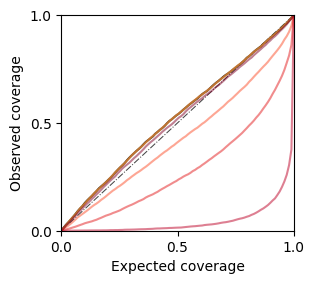

In [7]:
fig, ax = plot_expected_coverage(name, defense="FIMLargestEigenvalueRegularizer", hue="eps",with_eps=True, params_defense_beta=0.001, color_map=color_map_eps, with_grid=False)
ax.legend_ = None

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['f384a82e-5d83-4cb6-8a70-485eeb9cebba']


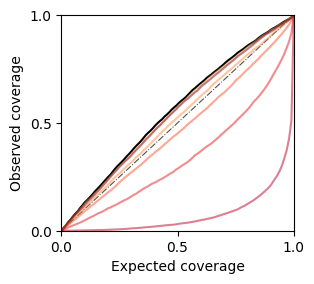

In [8]:
fig, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True, params_defense_beta=0.001,params_defense_algorithm="jac_exact", color_map=color_map_eps, with_grid=False)
ax.legend_ = None

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['82574463-0d70-4b0d-a45a-52ee574a9ffc']


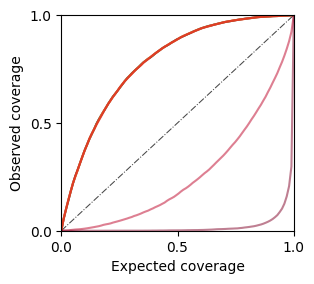

In [9]:
fig, ax = plot_expected_coverage(name, defense="FIMLargestEigenvalueRegularizer", hue="eps",with_eps=True, params_defense_beta=0.01, color_map=color_map_eps, with_grid=False)
ax.legend_ = None

Following data row is used:
Float64Index([0.1, 0.2, 0.3, 0.5, 1.0, 2.0], dtype='float64', name='eps')
['6bcf6d35-158f-4f4a-8e6f-71d5a618935a']


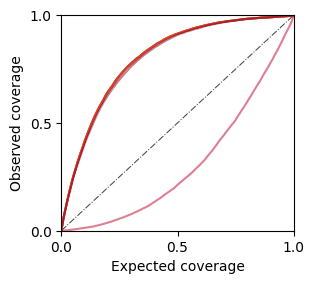

In [10]:
fig, ax = plot_expected_coverage(name, defense="FIMTraceRegularizer", hue="eps",with_eps=True, params_defense_beta=0.01,params_defense_algorithm="jac_exact", color_map=color_map_eps, with_grid=False)
ax.legend_ = None

In [8]:
query_main(name, expand_params_defense=True).groupby("defense").mean()

,N_train,N_val,N_test,train_loss,validation_loss,test_loss,train_time,sim_time,seed,params_defense_scale_eps_beta_by_std,params_defense_beta,params_defense_mc_samples,params_defense_ema_mc_samples,params_defense_ema_decay,params_defense_max_iters
defense,,,,,,,,,,,,,,,
FIMLargestEigenvalueRegularizer,100000.0,512.0,10000.0,-5.633218,-5.213174,-5.513120,19596.662684,NaN,0.0,1.0,0.027775,50.0,NaN,NaN,50.0
FIMTraceRegularizer,100000.0,512.0,10000.0,-4.974744,-4.608784,-5.115156,393.527694,2.737547,0.0,1.0,0.027775,50.0,5.0,0.85,NaN


In [10]:
query_main(name, expand_params_defense=True).groupby("params_defense_algorithm").mean()

,N_train,N_val,N_test,train_loss,validation_loss,test_loss,train_time,sim_time,seed,params_defense_scale_eps_beta_by_std,params_defense_beta,params_defense_mc_samples,params_defense_ema_mc_samples,params_defense_ema_decay,params_defense_max_iters
params_defense_algorithm,,,,,,,,,,,,,,,
ema,100000.0,512.0,10000.0,-4.973595,-4.519101,-5.083141,101.594846,2.737547,0.0,1.0,0.027775,50.0,5.0,0.85,NaN
jac_exact,100000.0,512.0,10000.0,-5.304556,-4.955820,-5.330146,10141.061612,NaN,0.0,1.0,0.027775,50.0,5.0,0.85,50.0
